<a href="https://colab.research.google.com/github/BSaahan/Titanic-Classifier-ML-project/blob/main/Titanic_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
n = df.isna().sum().sort_values(ascending=False)
n = n[n>0]
n

Series([], dtype: int64)

In [ ]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

**DATA VISUALIZATION**

In [ ]:
d1 = df['Sex'].value_counts()
d1

male      95
female    88
Name: Sex, dtype: int64

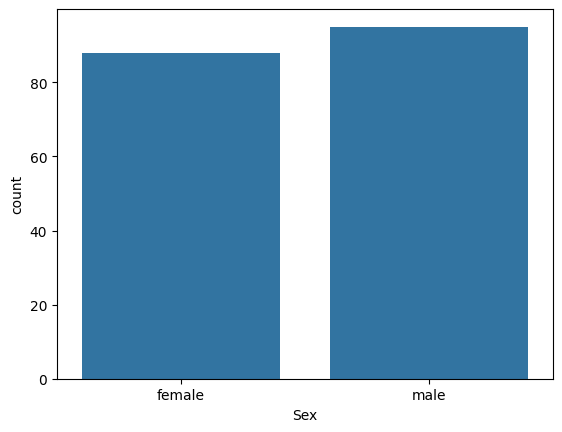

In [ ]:
#Plotting Count plot For sex column
sns.countplot(x= df['Sex'], data = df)
plt.show()

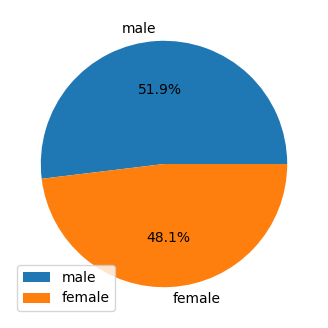

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(d1.values,labels=d1.index,autopct='%.1f%%')
plt.legend()
plt.show()

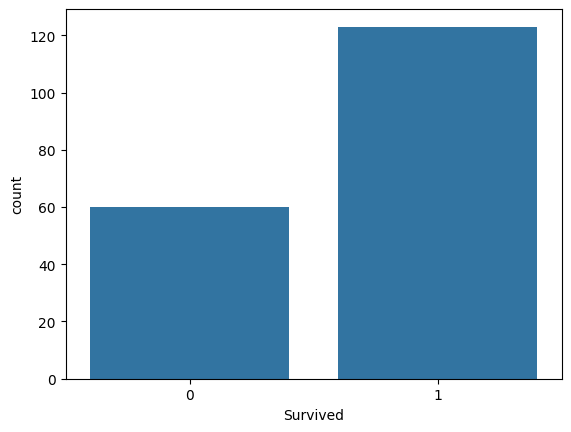

In [ ]:
#Plotting Count plot For Survived column
sns.countplot(x= df['Survived'], data = df)
plt.show()

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Sex','Embarked']:
       df[column] = le.fit_transform(df[column])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2


**DATA MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[cols]
y = df['Survived']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))


(183, 7)
(183,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,2
6,1,1,54.0,0,0,51.8625,2
10,3,0,4.0,1,1,16.7000,2
11,1,0,58.0,0,0,26.5500,2


In [ ]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

**LOGISTIC REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def cls_eval(ytest,ypred):
     cm = confusion_matrix(ytest,ypred)
     print('Confusion Matrix\n',cm)
     print('Classifier Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(X_train,y_train))         #Training Accuracy
    print('Testing Score',model.score(X_test,y_test))


In [ ]:
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
mscore(lr)

Training Score 0.7465753424657534
Testing Score 0.7567567567567568


In [ ]:
ypred_lr = lr.predict(X_test)
print(ypred_lr)

[1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1]


In [ ]:
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[ 8  6]
 [ 3 20]]
Classifier Report
               precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.77      0.87      0.82        23

    accuracy                           0.76        37
   macro avg       0.75      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37

Accuracy Score 0.7567567567567568


**DECISION TREE**

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**RANDOM FOREST**

In [ ]:
mscore(dt_classifier)

Training Score 0.7945205479452054
Testing Score 0.8108108108108109


In [ ]:
ypred_dt_classifier = dt_classifier.predict(X_test)
print(ypred_dt_classifier)

[0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1]


In [ ]:
cls_eval(y_test,ypred_dt_classifier)
acc_dt_classifier = accuracy_score(y_test,ypred_dt_classifier)
print('Accuracy Score',acc_dt_classifier)

Confusion Matrix
 [[12  2]
 [ 5 18]]
Classifier Report
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.90      0.78      0.84        23

    accuracy                           0.81        37
   macro avg       0.80      0.82      0.81        37
weighted avg       0.83      0.81      0.81        37

Accuracy Score 0.8108108108108109


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy',min_samples_split=5,max_depth=10,random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [ ]:
mscore(rf_classifier)

Training Score 0.9726027397260274
Testing Score 0.7027027027027027


In [ ]:
ypred_rf_classifier = rf_classifier.predict(X_test)
print(ypred_rf_classifier)

[1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
cls_eval(y_test,ypred_rf_classifier)
acc_rf_classifier = accuracy_score(y_test,ypred_rf_classifier)
print('Accuracy Score',acc_rf_classifier)

Confusion Matrix
 [[ 5  9]
 [ 2 21]]
Classifier Report
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.70      0.91      0.79        23

    accuracy                           0.70        37
   macro avg       0.71      0.64      0.63        37
weighted avg       0.71      0.70      0.67        37

Accuracy Score 0.7027027027027027


 **AdaBoost Classifier**

In [ ]:
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
ada_classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=42),
                   n_estimators=100, random_state=42)

In [ ]:
mscore(ada_classifier)

Training Score 1.0
Testing Score 0.7297297297297297


In [ ]:
ypred_ada_classifier = rf_classifier.predict(X_test)
print(ypred_ada_classifier)

[1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
cls_eval(y_test,ypred_ada_classifier)
acc_ada_classifier = accuracy_score(y_test,ypred_ada_classifier)
print(ypred_ada_classifier)

Confusion Matrix
 [[ 5  9]
 [ 2 21]]
Classifier Report
               precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.70      0.91      0.79        23

    accuracy                           0.70        37
   macro avg       0.71      0.64      0.63        37
weighted avg       0.71      0.70      0.67        37

[1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
}

In [ ]:
for name, classifier in classifiers.items():
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score
    print(f"{name}: Accuracy = {accuracy:.4f}")

Random Forest: Accuracy = 0.7297
AdaBoost: Accuracy = 0.7838
Decision Tree: Accuracy = 0.8108
Logistic Regression: Accuracy = 0.7568


In [ ]:
data = {'Model': ['Random Forest', 'AdaBoost', 'Decision Tree','Logistic Regression'],
        'Score': [0.85, 0.78, 0.82,0.75]}

In [ ]:
model = pd.DataFrame(data)

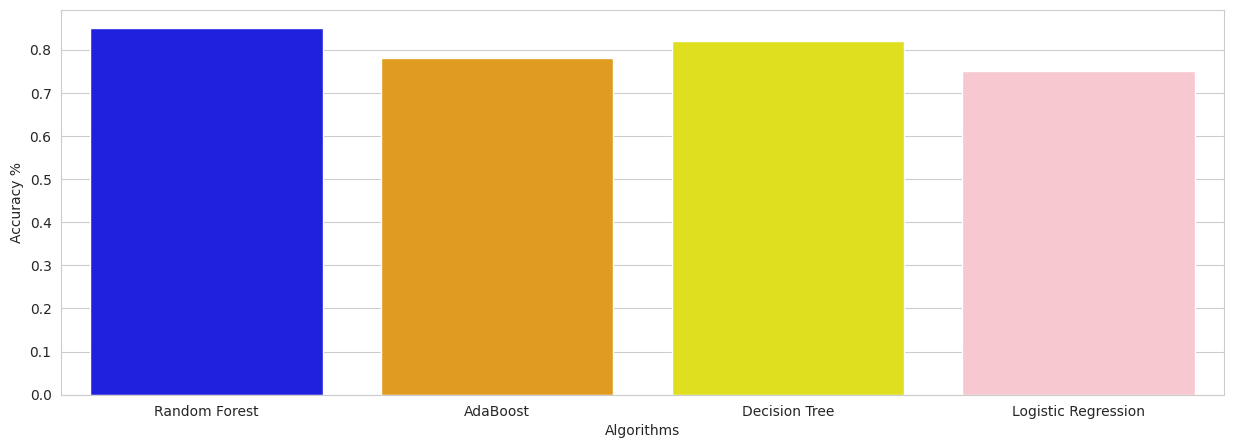

In [ ]:
colors = ["blue","orange","yellow","pink"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=model['Model'], y=model['Score'], palette=colors)
plt.show()
